In [4]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# 1. Load and Prepare the Iris Dataset
def load_and_prepare_data():
    iris = load_iris()
    X = iris.data  # Features
    y = iris.target  # Target labels (0, 1, 2)
    
    # One-hot encode the target labels
    y_onehot = tf.keras.utils.to_categorical(y, num_classes=3)
    
    # Split the data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_and_prepare_data()

In [7]:
# 2. Define the Neural Network Model
def create_model(input_dim, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),  # Dropout for regularization
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [8]:
# Initialize the model
input_dim = X_train.shape[1]
num_classes = y_train.shape[1]
model = create_model(input_dim, num_classes)

c:\Users\Owner\.ai-navigator\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 3. Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6826 - loss: 0.9009 - val_accuracy: 0.7273 - val_loss: 0.7992
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7432 - loss: 0.7380 - val_accuracy: 0.7273 - val_loss: 0.6976
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7493 - loss: 0.6960 - val_accuracy: 0.7273 - val_loss: 0.6180
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7482 - loss: 0.6289 - val_accuracy: 0.7273 - val_loss: 0.5531
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8035 - loss: 0.5921 - val_accuracy: 0.7727 - val_loss: 0.4992
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8216 - loss: 0.5230 - val_accuracy: 0.7727 - val_loss: 0.4570
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8615 - loss: 0.4585 - val_accuracy: 0.7727 - val_loss: 0.4227
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8662 - loss: 0.4004 - val_accuracy: 0.8182 - val_loss: 0.3947


In [12]:
# 4. Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.1869
Test Accuracy: 0.9130


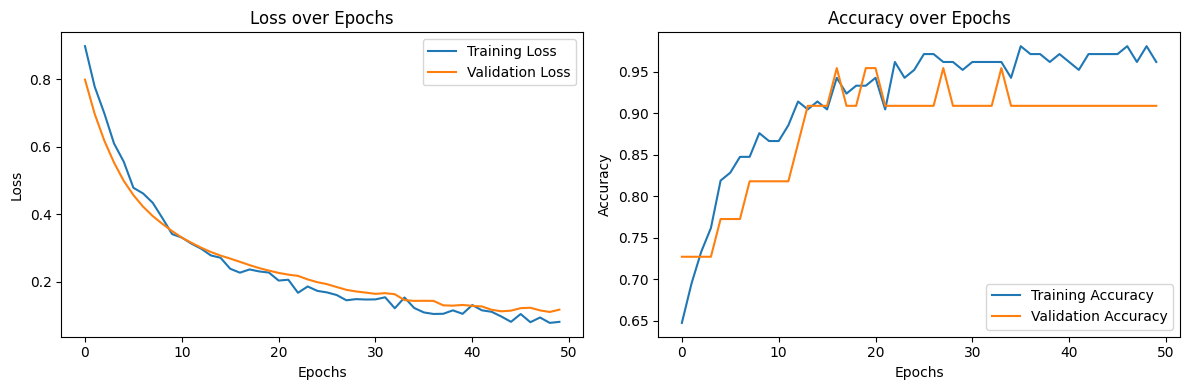

In [13]:
# 5. Plot Training and Validation Performance
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [14]:
# 6. Predict on Test Data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [15]:
# 7. Classification Report

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=load_iris().target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.88      0.88      0.88         8
   virginica       0.89      0.89      0.89         9

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.92        23
weighted avg       0.91      0.91      0.91        23


Confusion Matrix:
[[6 0 0]
 [0 7 1]
 [0 1 8]]


This is a test cell
## Test1
### Test3